In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("./mydata/spy_daily_with_gap_features.csv")
df["Date"] = pd.to_datetime(df["Date"])  # convert "Date" column to datetime type
df["Year"] = df["Date"].dt.year  # extract year and add to a new column "Year"
df["Month"] = df["Date"].dt.month  # extract month and add to a new column "Month"
df["Day"] = df["Date"].dt.day

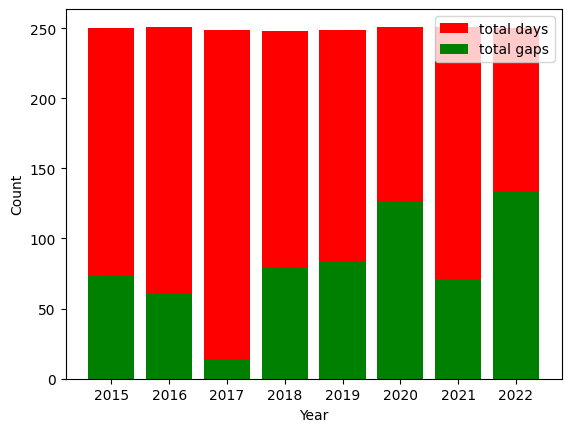

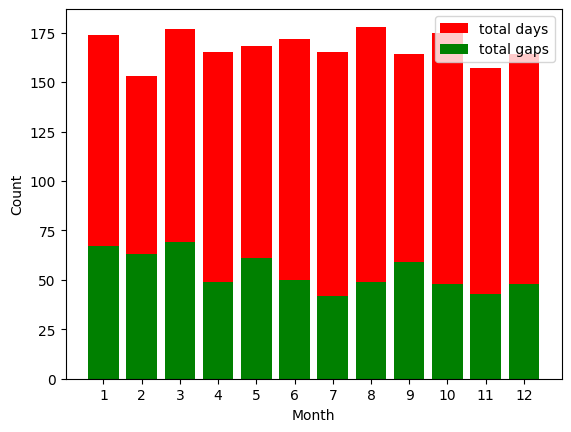

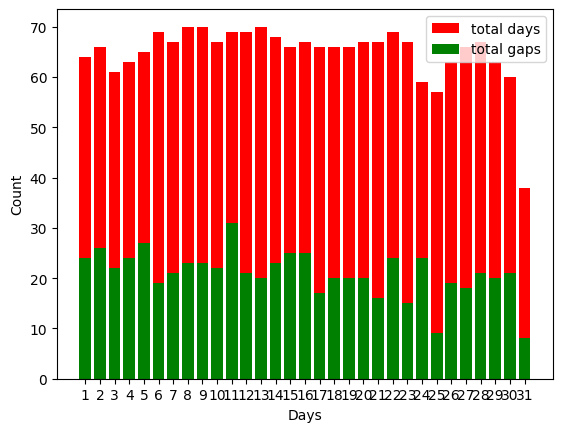

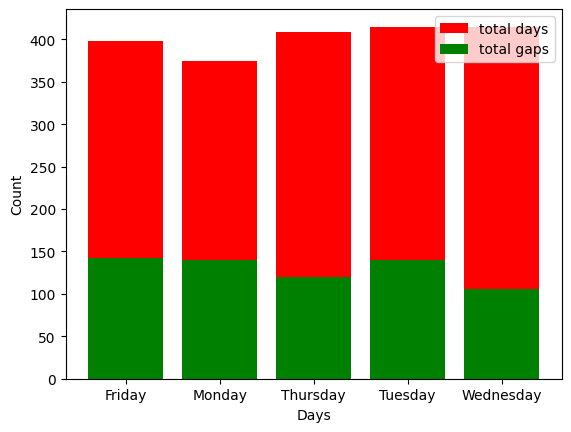

In [6]:
years = range(2015, 2023)  # set the range of years
for year in years:
    filtered_df = df[df["Year"] == year]  # filter the data by the year

    gaps = filtered_df[filtered_df["is_gapped"] == True].shape[0]
    total_trading_days = filtered_df.shape[0]
    plt.bar([str(year)], total_trading_days, color="red")
    plt.bar([str(year)], [gaps], color="green")

plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(["total days", "total gaps"])
plt.show()
month_group = df.groupby("Month")
months = range(1, 13)

for month in months:
    filtered_df = month_group.get_group(month)

    gaps = filtered_df[filtered_df["is_gapped"] == True].shape[0]
    total_trading_days = filtered_df.shape[0]

    if total_trading_days == 0:  # check for division by zero
        continue

    plt.bar([str(month)], total_trading_days, color="red")
    plt.bar([str(month)], [gaps], color="green")

plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(["total days", "total gaps"])
plt.show()
# plt.savefig("plots/number_of_gaps_per_month.png")
day_group = df.groupby("Day")
months = range(1, 32)

for month in months:
    filtered_df = day_group.get_group(month)

    gaps = filtered_df[filtered_df["is_gapped"] == True].shape[0]
    total_trading_days = filtered_df.shape[0]

    if total_trading_days == 0:  # check for division by zero
        continue

    plt.bar([str(month)], total_trading_days, color="red")
    plt.bar([str(month)], [gaps], color="green")

plt.xlabel("Days")
plt.ylabel("Count")
plt.legend(["total days", "total gaps"])
plt.show()
# plt.savefig("plots/number_of_gaps_per_days.png")

df["Date"] = pd.to_datetime(df["Date"])  # convert "Date" column to datetime type
df["Day_of_Week"] = df["Date"].dt.day_name()
day_of_week_group = df.groupby("Day_of_Week")

for day, group in day_of_week_group:
    filtered_df = day_of_week_group.get_group(day)

    gaps = filtered_df[filtered_df["is_gapped"] == True].shape[0]
    total_trading_days = filtered_df.shape[0]

    if total_trading_days == 0:  # check for division by zero
        continue

    plt.bar([str(day)], total_trading_days, color="red")
    plt.bar([str(day)], [gaps], color="green")

plt.xlabel("Days")
plt.ylabel("Count")
plt.legend(["total days", "total gaps"])
plt.show()